# College Admission Analysis Python Project

Team member: Qinghao Xia, Qihua Zhu

### Introdution
Applying for a college has never been easy, especially for a good for a student who is working on getting accepted by the top universities. The number of applications from freshman-year students has increased 7% over the last year while admission rate remain consisted. With the large increasing in the applications but consisting of admission, the acceptance rate has been dropped dramatically. Especially for the top universities, the competition in admission has increased rapidly. As one of the students who was struggling about choosing a good university, we use to striving about how to make our investment in education could have a better payback in the future. We may make some mistakes in choosing the university due to lack of information. Thus, we don't want a student who also makes a bad choice due to lack of information. Therefore, we want to find out what would affect the admission rate.

In order to help students be prepared and have a deeper understanding of the university culture in the United States, we decide to launch a study of the U.S. College admission analysis project.

We believe that our research could be very useful for the student who doesn't have any better insights and struggling in university-chosen. The United States is never equal in terms of income and the cost of leaving. Therefore, the **tuition** of colleges in different states varies from each other. The difference in the tuition maybe one element affects the average admission rate. One of another factor that may affect the admission rate could be the **population** of each state. For instance, the state has a large population may have a lower admission rate due to the have level of competition.  **SAT score** could be one very important factor that affect the admission rate. The higher the score the lower the admission rate also due to the competition. Moreover, the percnetage of **Pell Grant received** or **student loan received** could also be the factor that may affect the admission rate. We will explore the relationship between the admission rate and these factors under the Exploratory Data Analyzation (EDA) section. 

Also, we want to know if there is any other variable same as admission rate could also affect by the factors such as state population, income level, SAT score, or the factors mentioned above, and how easily or hardly the variable would be affected when compared with the admission rate.



### Research Questions
Before we start our research, we have talked to the student representatives , and have an understanding about what are the most important questions that student who is planning to apply the U.S. based university want to know. Thus, we made a list shows these questions: 
 

- How the average admission rate vary from states?

- Are schools with higher admission rate always located at place with large population?

- Could we predict a certain admission rate for a school? If not, what could we predict? 

- Is there a relationship between income and Admission rate?

- Is there a relationship between SAT and Admission rate?

### Data Acquisition 

One of the most important things of our study is to acquire useful dataset. Also, the dataset required should be large enough to make sure the study is not biased. The resource of data should be as the higher authority as possible to make sure the study has better credibility. Moreover, the quality of the data should one thing we need to pay attention to, the data lack of quality would have very bad influence to our study; thus we need to avoid using the data lack of quality.

To fulfill the requirement above, we use the dataset download from *College Scorecard Data* which run by the U.S. Department of Education. The dataset contains all the factors we mentioned above. The dataset was last updated on October 30, 2018, this includes all data we need in 2017. This dataset is the main dataset we used in our analysis program. 

Also, there are two other complementary datasets that we acquired from the United States Census Bureau by using API. One dataset contains the population of each state in the U.S. in the year of 2017, another contains the income level of the household for each state in 2017. 

Here are the link of each dataset.

Major dataset:
https://collegescorecard.ed.gov/data/

Complementary datasets:
https://api.census.gov/data/2017/pep/charagegroups?get=POP,GEONAME&for=state&DATE=9

https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEMHI_PT&for=state:*&time=2017

We use the data include **1,200+ universities** located in **50 states** of the United States to make sure that our dataset is large enough to allow us have accrurate analysis. 

### Steps of the Analysis

Our study will follow the steps below:
1. Modules Import
2. Import CSV & API Datasets 
3. Exploratory Data Analysis(EDA)
4. Linear Regression Analysis
5. Draw Conclusion
6. Make a Mini-Chatbot: SAT for a School?


## 1. Modules Import

Before we start the analysis program we need to import the following modules that might need in the analysis. However, there are some modules may be needed for a specific use, such as draw certain graph, will need to be imported in separately.

In [1]:
import numpy as np
import pandas as pd
from sympy import init_printing, Matrix, Symbol, Function
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import requests
import seaborn as sns

3.7.1


## 2. Import CSV & API Datasets 

Since the major dataset we are using is the dataset download from College Scorecard Data, we will integrate the data acquired from two complementary datasets to the major dataset in order to do the EDA.

### Import CSV

#### Data transformation
After imported the dataset, we found some numerical data were object, so we performed a **data transformation** and turned them into the form of float.

In [2]:
import pandas as pd
csv_df = pd.read_csv('https://raw.githubusercontent.com/Johnnydaszhu/DAV-5400/master/MERGED2016_17_PP.csv')
csv_df.head()

csv_df.replace('PrivacySuppressed', np.nan, inplace=True)
csv_df.head()

csv_df.describe(include='all')

csv_df[['AGE_ENTRY','FEMALE','MARRIED','VETERAN','FIRST_GEN','FAMINC','MD_FAMINC']] = csv_df[['AGE_ENTRY','FEMALE','MARRIED','VETERAN','FIRST_GEN','FAMINC','MD_FAMINC']].astype('float64')
csv_df.dtypes

INSTNM             object
CITY               object
STABBR             object
ZIP                object
ACCREDAGENCY       object
INSTURL            object
CONTROL             int64
LATITUDE          float64
LONGITUDE         float64
MENONLY           float64
WOMENONLY         float64
ADM_RATE_ALL      float64
SAT_AVG           float64
DISTANCEONLY      float64
UGDS              float64
UGDS_WHITE        float64
UGDS_BLACK        float64
UGDS_HISP         float64
UGDS_ASIAN        float64
UGDS_AIAN         float64
UGDS_NHPI         float64
UGDS_2MOR         float64
UGDS_NRA          float64
UGDS_UNKN         float64
COSTT4_A          float64
TUITIONFEE_IN     float64
TUITIONFEE_OUT    float64
AVGFACSAL         float64
PCTPELL           float64
RET_FT4           float64
PCTFLOAN          float64
AGE_ENTRY         float64
FEMALE            float64
MARRIED           float64
VETERAN           float64
FIRST_GEN         float64
FAMINC            float64
MD_FAMINC         float64
dtype: objec

To help ourselves have a better understanding of the dataset and enable to integrate three datasets we use the *pd.decribe* function to have a first glance of the major dataset we are going to use. Based on the table below, we find that there are 7,175 universities were register with the U.S. Department of Education. However, this is much larger than the dataset we need (1,200+). Also, there are some university is out of the territory of the 50 states of the U.S. since the unique value under the *STABBR*(state name abbreviation) shows "59". Thus, we decided to choose the universities that not lack of any data and in the territory of the 50 states of the U.S...

In [3]:
csv_df.describe(include='all')

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,CONTROL,LATITUDE,LONGITUDE,MENONLY,...,PCTPELL,RET_FT4,PCTFLOAN,AGE_ENTRY,FEMALE,MARRIED,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC
count,7175,7175,7175,7175,6682,7163,7175.000000,6737.000000,6737.000000,6737.000000,...,6427.000000,2169.000000,6427.000000,6839.000000,5839.000000,5890.000000,2656.000000,6046.000000,6839.000000,6839.000000
unique,7023,2481,59,6277,41,5980,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,McCann School of Business & Technology,New York,CA,78229,Higher Learning Commission,www.empire.edu,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,87,717,8,1229,83,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.144669,37.357994,-90.279953,0.009648,...,0.496001,0.717068,0.491172,26.086092,0.640156,0.164695,0.015422,0.457055,38100.316741,27804.630282
std,NaN,NaN,NaN,NaN,NaN,NaN,0.836163,5.848580,17.799600,0.097758,...,0.222273,0.182158,0.280558,3.997861,0.185389,0.099348,0.022786,0.126630,23052.951041,19179.916042
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-14.322636,-170.742774,0.000000,...,0.000000,0.000000,0.000000,17.427711,0.016129,0.002738,0.001021,0.088670,321.385321,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,33.945259,-97.327948,0.000000,...,0.328300,0.633600,0.276750,23.258427,0.549655,0.096742,0.006581,0.378954,22392.361120,15887.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,38.801588,-86.360618,0.000000,...,0.480500,0.747600,0.552500,25.855573,0.628070,0.152868,0.009996,0.476517,31193.595460,21715.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,41.333225,-78.880326,0.000000,...,0.660900,0.835200,0.708250,28.581415,0.764236,0.216899,0.016258,0.543534,47367.375000,33378.750000


In [4]:
# Exclude out of state schools
csv_df = csv_df[~csv_df['STABBR'].isin(['AS','DC','FM','GU','MH','MP','PW','PR','VI'])]

In [5]:
csv_df.describe(include='all')

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,CONTROL,LATITUDE,LONGITUDE,MENONLY,...,PCTPELL,RET_FT4,PCTFLOAN,AGE_ENTRY,FEMALE,MARRIED,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC
count,6995,6995,6995,6995,6514,6983,6995.000000,6561.000000,6561.000000,6561.000000,...,6263.000000,2089.000000,6263.000000,6669.000000,5678.000000,5733.000000,2625.000000,5881.000000,6669.000000,6669.000000
unique,6846,2438,50,6143,41,5836,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,McCann School of Business & Technology,New York,CA,78229,Higher Learning Commission,www.empire.edu,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,87,717,8,1228,83,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.140672,37.812691,-91.100363,0.009907,...,0.487668,0.716972,0.499326,26.121210,0.641576,0.166402,0.015510,0.457087,38683.216047,28299.527965
std,NaN,NaN,NaN,NaN,NaN,NaN,0.838178,5.066524,15.779825,0.099047,...,0.216935,0.182621,0.277156,4.002172,0.185775,0.099185,0.022894,0.125891,22880.251790,19017.466839
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,19.701189,-159.395883,0.000000,...,0.000000,0.000000,0.000000,17.427711,0.016129,0.005046,0.001021,0.088670,321.385321,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,34.066591,-97.502253,0.000000,...,0.324950,0.633900,0.300150,23.290572,0.549602,0.098899,0.006616,0.378973,22994.267790,16215.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,38.919788,-86.860363,0.000000,...,0.472700,0.747500,0.559700,25.891814,0.628432,0.154444,0.010074,0.476562,31493.812080,22014.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,41.422951,-79.927333,0.000000,...,0.650150,0.833800,0.712550,28.652174,0.770168,0.216899,0.016304,0.543534,48127.358380,34000.000000


### Import API Datasets
Since two complementary datasets contain the data of 50 states. We decide to append the abbreviation column for both datasets; so that we can integrate the data from these datasets by use *pd.merge* function. To achieve this idea, we search online and find a dictionary that contains the abbreviation for each state.

In [6]:
# get the dictionary from this website: https://gist.github.com/rogerallen/1583593
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

### Import API Datasets (Income)

Read API

In [7]:
# read API
url1 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEMHI_PT&for=state:*&time=2017'
r1 = requests.get(url1)
r1

<Response [200]>

The dataset loaded in form of list.

In [8]:
# now convert the 'r' object's JSON content into a list of 
# native Python objects
api_data1 = r1.json()
type(api_data1)

list

The length of the dataset we get by using API contains 52 rows.

In [9]:
len(api_data1)

52

Convert dataset from JSON to Pandas dataframe.

In [10]:
# now convert some of the extracted JSON data into a data frame: in this
# components of the dict object
api_df1 = pd.DataFrame(api_data1)
api_df1.head(5)

,0,1,2,3
0,NAME,SAEMHI_PT,time,state
1,Arizona,56508,2017,04
2,Arkansas,45916,2017,05
3,Alabama,48193,2017,01
4,Alaska,74058,2017,02


Make the dataset ready to use.

In [11]:
# make the dataset ready to use
api_df1.columns = api_df1.iloc[0]
api_df1= api_df1.drop([0,0])
api_df1.head(5)

,NAME,SAEMHI_PT,time,state
1,Arizona,56508,2017,04
2,Arkansas,45916,2017,05
3,Alabama,48193,2017,01
4,Alaska,74058,2017,02
5,California,71785,2017,06


In [12]:
# change dtypes
api_df1['SAEMHI_PT'] = api_df1['SAEMHI_PT'].astype('int64')
api_df1.dtypes

0
NAME         object
SAEMHI_PT     int64
time         object
state        object
dtype: object

In [13]:
# Drop the unrlated column
api_df1=api_df1.drop(['time','state'],axis=1)
api_df1.head(5)

,NAME,SAEMHI_PT
1,Arizona,56508
2,Arkansas,45916
3,Alabama,48193
4,Alaska,74058
5,California,71785


In [14]:
# append the abbrev column and drop the data out of 50 states
api_df1['STABBR'] = api_df1['NAME'].map(us_state_abbrev)
api_df1.dropna().head(5)

,NAME,SAEMHI_PT,STABBR
1,Arizona,56508,AZ
2,Arkansas,45916,AR
3,Alabama,48193,AL
4,Alaska,74058,AK
5,California,71785,CA


### Import API Datasets (Population)

Read API

In [15]:
# read API
url = 'https://api.census.gov/data/2017/pep/charagegroups?get=POP,GEONAME&for=state&DATE=9'
r = requests.get(url)
r

<Response [200]>

The dataset loaded in form of list.

In [16]:
# now convert the 'r' object's JSON content into a list of 
# native Python objects
api_data = r.json()
type(api_data)

list

The length of the dataset we get by using API contains 53 rows.

In [17]:
len(api_data)

53

Convert dataset from JSON to Pandas dataframe.

In [18]:
# now convert some of the extracted JSON data into a data frame: in this
# components of the dict object
api_df2 = pd.DataFrame(api_data)
api_df2.head(5)

,0,1,2,3
0,POP,GEONAME,DATE,state
1,4860545,Alabama,9,01
2,741522,Alaska,9,02
3,6908642,Arizona,9,04
4,2988231,Arkansas,9,05


Make the dataset ready to use.

In [19]:
# make the dataset ready to use
api_df2.columns = api_df2.iloc[0]
api_df2= api_df2.drop([0,0])
api_df2.head(5)

,POP,GEONAME,DATE,state
1,4860545,Alabama,9,01
2,741522,Alaska,9,02
3,6908642,Arizona,9,04
4,2988231,Arkansas,9,05
5,39296476,California,9,06


In [20]:
# change dtypes
api_df2['POP'] = api_df2['POP'].astype('int64')
api_df2.dtypes

0
POP         int64
GEONAME    object
DATE       object
state      object
dtype: object

In [21]:
# append the abbrev column
api_df2['STABBR'] = api_df2['GEONAME'].map(us_state_abbrev)
api_df2.head(5)

,POP,GEONAME,DATE,state,STABBR
1,4860545,Alabama,9,01,AL
2,741522,Alaska,9,02,AK
3,6908642,Arizona,9,04,AZ
4,2988231,Arkansas,9,05,AR
5,39296476,California,9,06,CA


In [22]:
# drop the irrelevant columns.
api_df2.drop(columns=['GEONAME','DATE','state'],inplace=True)
api_df1.drop(columns=['NAME'],inplace=True)

Change the name of the dataset, and make sure they are ready to be integrated.

In [23]:
api_in_df = api_df2
api_pop_df = api_df1

In [24]:
api_in_df.head(5)

,POP,STABBR
1,4860545,AL
2,741522,AK
3,6908642,AZ
4,2988231,AR
5,39296476,CA


In [25]:
api_pop_df.head(5)

,SAEMHI_PT,STABBR
1,56508,AZ
2,45916,AR
3,48193,AL
4,74058,AK
5,71785,CA


### Merge three Datasets into one

In [26]:
csvapi_df= pd.merge(csv_df,api_pop_df,on = ['STABBR'], how='outer' )
csvapi_df= pd.merge(csvapi_df,api_in_df,on = ['STABBR'], how='outer' )
csvapi_df.head(5)

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,CONTROL,LATITUDE,LONGITUDE,MENONLY,...,PCTFLOAN,AGE_ENTRY,FEMALE,MARRIED,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,SAEMHI_PT,POP
0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,1.0,34.783368,-86.568502,0.0,...,0.7667,20.283741,0.564030,0.009102,0.003139,0.365828,32362.82611,23553.0,48193,4860545
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,1.0,33.505697,-86.799345,0.0,...,0.5179,23.607975,0.639091,0.105087,0.003168,0.341224,51306.67431,34489.0,48193,4860545
2,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,2.0,32.362609,-86.174010,0.0,...,0.8436,33.672297,0.648649,0.236486,0.040541,0.512500,21079.47297,15033.5,48193,4860545
3,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,1.0,34.724557,-86.640449,0.0,...,0.4312,22.727920,0.476350,0.100460,NaN,0.310132,61096.58895,44787.0,48193,4860545
4,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,1.0,32.364317,-86.295677,0.0,...,0.8113,20.130990,0.613419,0.007987,NaN,0.343434,31684.38219,22080.5,48193,4860545


## 3. Basic Exploratory Data Analysis (EDA)
#### For the API Dataset(Income):
- There are totally 52 rows in this dataset
- The data under **SAEMHI_PT** column should be numerical, the data under the rest columns can be categorical, thus we consider to change the data type under the **SAEMHI_PT** column. 
- Since states' name in the *csv* data we are using are abbreviated, thus we think we need to replace the states' name to the abbreviated name. 
- The dataset contains District of Columbia and Puerto Rico. These two region are irrelevant to our study.

#### For the API Dataset(population):
- There are totally 53 rows in this dataset
- The data under **POP** column should be numerical, the data under the rest columns can be categorical, thus we consider to change the data type under the **POP** column. 
- The data under DATE and state column is irrelevant to our study, we consider to drop these columns off
- Since states' name in the *csv* data we are using are abbreviated, thus we think we need to replace the states' name to the abbreviated name. 
- The dataset contains District of Columbia and Puerto Rico. These two region are irrelevant to our study. 

 

#### For the CSV Dataset:
- There are 7023 unique institutions and 41 Accredagency in total
- The average overall admission rate is 0.674 and the standard deviation is 0.202
- The average SAT score is 1060.2 and the standard deviation is 136.8
- The average total enrollment of undergraduate, degree-seeking students, based on fall enrollment(UGDS) is 2424 and the standard deviation is 5477
- The average annual cost of attendance is 25807 and the standard deviation is 14341
- The average in state tuition is 14697 and the average out of state tuition is 17788
- The average faculty salary (AVGFACSAL) per month is 6483 and the standard deviation is 2417
- The average percentage of who received Pell Grants in the year 2016~2017 is 0.496 and the standard deviation is 0.22
- The average retention rate for four year is 0.717 and the standard deviation is 0.18
- The average percent of Undergraduates Receiving Federal Loans is 0.49 and the standard deviation is 0.28

### EDA for Integrated dataset

Set up the evironment in order to draw the charts for EDA.

In [27]:
# setup the environment.
result03 = csvapi_df.drop(columns=['DISTANCEONLY','CONTROL','MENONLY','WOMENONLY','LATITUDE', 'LONGITUDE','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN'])
result04 = csvapi_df[['STABBR','ADM_RATE_ALL','SAT_AVG','POP','SAEMHI_PT']].groupby('STABBR').mean().reset_index()

Based on the integrated data we find that the gender could be one factor that could affect the admission rate.

In [28]:
# Use groupby function to make a new dataframe of Menonly and womenonly school.
csvapi_df.groupby(['MENONLY','WOMENONLY']).count()

INSTNM  CITY  STABBR   ZIP  ACCREDAGENCY  INSTURL  CONTROL  \
MENONLY WOMENONLY                                                               
0.0     0.0          6458  6458    6458  6458          6045     6458     6458   
        1.0            38    38      38    38            38       38       38   
1.0     0.0            65    65      65    65            63       62       65   

                   LATITUDE  LONGITUDE  ADM_RATE_ALL  ...   PCTFLOAN  \
MENONLY WOMENONLY                                     ...              
0.0     0.0            6458       6458          1980  ...       6163   
        1.0              38         38            38  ...         38   
1.0     0.0              65         65            45  ...         62   

                   AGE_ENTRY  FEMALE  MARRIED  VETERAN  FIRST_GEN  FAMINC  \
MENONLY WOMENONLY                                                           
0.0     0.0             6161    5270     5293     2330       5431    6161   
        1.0               38      14       25        1         37      38   
1.0     0.0               56       0       11        0          6      56   

                   MD_FAMINC  SAEMHI_PT   POP  
MENONLY WOMENONLY                              
0.0     0.0             6161       6458  6458  
        1.0               38         38    38  
1.0     0.0               56         65    65  

[3 rows x 38 columns]

There are 38 women-only and 65 for men-only institutions

In [29]:
# Use groupby function to make a new dataframe of Menonly and womenonly school.
csvapi_df.groupby(['MENONLY','WOMENONLY']).mean()

CONTROL   LATITUDE  LONGITUDE  ADM_RATE_ALL      SAT_AVG  \
MENONLY WOMENONLY                                                             
0.0     0.0          2.131  37.786261 -91.267816      0.666488  1059.466985   
        1.0          2.000  38.783924 -84.322622      0.636254  1074.096774   
1.0     0.0          2.000  39.870847 -78.425550      0.819480  1089.000000   

                   DISTANCEONLY         UGDS  UGDS_WHITE  UGDS_BLACK  \
MENONLY WOMENONLY                                                      
0.0     0.0            0.007278  2472.983341    0.509291    0.188381   
        1.0            0.000000  1276.947368    0.523203    0.181605   
1.0     0.0            0.000000   303.161290    0.888565    0.019706   

                   UGDS_HISP      ...       PCTFLOAN  AGE_ENTRY    FEMALE  \
MENONLY WOMENONLY                 ...                                       
0.0     0.0         0.156799      ...       0.502742  26.064939  0.638865   
        1.0         0.111905      ...       0.653024  22.838484  0.905822   
1.0     0.0         0.031840      ...       0.065618  20.132057       NaN   

                    MARRIED   VETERAN  FIRST_GEN        FAMINC     MD_FAMINC  \
MENONLY WOMENONLY                                                              
0.0     0.0        0.163450  0.015661   0.456307  38800.026049  28346.617676   
        1.0        0.115685  0.012031   0.316134  63245.313354  46390.592105   
1.0     0.0        0.379952       NaN   0.245852  37683.556792  32808.178571   

                      SAEMHI_PT           POP  
MENONLY WOMENONLY                              
0.0     0.0        60508.847011  1.321101e+07  
        1.0        63304.078947  1.052429e+07  
1.0     0.0        64134.307692  1.590007e+07  

[3 rows x 32 columns]

In [30]:
csvapi_df.groupby(['MENONLY','WOMENONLY'])['ADM_RATE_ALL'].mean().reset_index()

,MENONLY,WOMENONLY,ADM_RATE_ALL
0,0.0,0.0,0.666488
1,0.0,1.0,0.636254
2,1.0,0.0,0.819480


In [31]:
abccd = csvapi_df.groupby(['MENONLY','WOMENONLY'])['ADM_RATE_ALL'].mean().reset_index().drop(['MENONLY','WOMENONLY'],axis=1).T
abccd.columns = ['Mix', 'WOMENONLY','MENONLY']
abccd.T

,ADM_RATE_ALL
Mix,0.666488
WOMENONLY,0.636254
MENONLY,0.819480


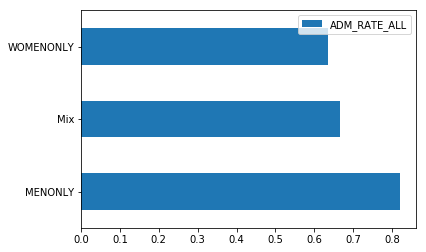

In [32]:
abccd.T.sort_values(by=['ADM_RATE_ALL'], ascending= False).plot.barh()

According to the chart, the admission rate for the men-only university is more than 80 percent, for women-only university is slightly higher than 60 percent, and for regular university is more than 65 percent. Thus, we conclude that the women-only college has lower admission rate. 

As one of the import factor that might affect the admission rate, **Control** factor include three different types of institutions and they are public-institution, private-institution, and private-institution for non-profit. Now let's take a look of these types.

In [33]:
# Use groupby function to make a new dataframe of Control
csvapi_df.groupby('CONTROL').count()

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,LATITUDE,LONGITUDE,MENONLY,WOMENONLY,...,PCTFLOAN,AGE_ENTRY,FEMALE,MARRIED,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,SAEMHI_PT,POP
CONTROL,,,,,,,,,,,,,,,,,,,,,
1.0,2034,2034,2034,2034,2013,2032,1953,1953,1953,1953,...,1935,2021,1933,1949,1131,1926,2021,2021,2034,2034
2.0,1943,1943,1943,1943,1859,1937,1809,1809,1809,1809,...,1573,1687,1502,1192,305,1416,1687,1687,1943,1943
3.0,3018,3018,3018,3018,2642,3014,2799,2799,2799,2799,...,2755,2961,2243,2592,1189,2539,2961,2961,3018,3018


In [34]:
csvapi_df.groupby('CONTROL').mean()

,LATITUDE,LONGITUDE,MENONLY,WOMENONLY,ADM_RATE_ALL,SAT_AVG,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,...,PCTFLOAN,AGE_ENTRY,FEMALE,MARRIED,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,SAEMHI_PT,POP
CONTROL,,,,,,,,,,,,,,,,,,,,,
1.0,38.026527,-91.452486,0.000000,0.000000,0.688867,1044.184314,0.002048,5971.902842,0.578031,0.141793,...,0.299620,24.649675,0.588880,0.128969,0.009005,0.438969,39601.999647,29982.228600,59595.990167,1.185143e+07
2.0,38.701972,-88.575630,0.035931,0.021006,0.644876,1071.006452,0.006633,1679.221239,0.568476,0.148521,...,0.551538,24.417637,0.601618,0.155784,0.018407,0.357172,57703.830034,44043.266449,61373.148739,1.337456e+07
3.0,37.088744,-92.486409,0.000000,0.000000,0.767875,991.000000,0.011075,414.177874,0.436045,0.239895,...,0.609781,28.096185,0.713745,0.199432,0.020955,0.526554,27219.306067,18181.181189,60618.892644,1.433841e+07


There are 2064 public institutions, 2009 private nonprofit institutions and 3102 private for-profit institutions.

In [35]:
con_sat = csvapi_df.groupby(['CONTROL'])['ADM_RATE_ALL'].mean().reset_index().T
con_sat.columns = ['Public', 'Private Nonprofit','Private for-profit']
con_sat = con_sat.drop(['CONTROL']).melt()
con_sat

,variable,value
0,Public,0.688867
1,Private Nonprofit,0.644876
2,Private for-profit,0.767875


In [36]:
con_sat.columns = ['Control', 'Admission Rate']
con_sat = con_sat.set_index('Control').sort_values(by=['Admission Rate'], ascending= False)

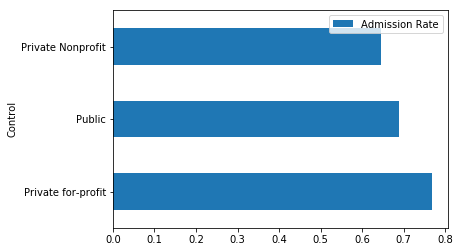

In [37]:
con_sat.plot.barh()

According to this chart, the private-for-nonprofit university has the admission rate slightly over 60 percent, the public university has the admission rate over 65 percent, and the private-for-profit university has the admission rate close to 80 percent. Thus, we believe that the private-for-nonprofit institution has the lowest admission rate.

In [38]:
csvapi_df_statead=csvapi_df.groupby('STABBR').mean().reset_index().sort_values(by=['ADM_RATE_ALL'], ascending= True).head(5)
csvapi_df_statead

,STABBR,CONTROL,LATITUDE,LONGITUDE,MENONLY,WOMENONLY,ADM_RATE_ALL,SAT_AVG,DISTANCEONLY,UGDS,...,PCTFLOAN,AGE_ENTRY,FEMALE,MARRIED,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,SAEMHI_PT,POP
6,CT,2.102273,41.496208,-72.847398,0.000000,0.011905,0.553912,1034.642857,0.011905,1963.134146,...,0.481215,26.240299,0.613478,0.120613,0.014857,0.476380,45515.713297,33485.804598,74428,3587685
19,MD,2.152174,39.185355,-76.828658,0.022989,0.011494,0.593958,1060.684211,0.000000,3215.883721,...,0.509055,26.130799,0.644905,0.141935,0.010415,0.450997,42790.168122,30832.460674,80711,6024752
31,NM,1.820000,34.695529,-106.097568,0.000000,0.000000,0.598176,991.333333,0.000000,2086.255319,...,0.369187,25.811847,0.620765,0.153030,0.007441,0.470201,31438.402495,22245.843750,47086,2085432
18,MA,2.059140,42.297945,-71.433983,0.011236,0.028090,0.617944,1142.800000,0.005618,2130.783133,...,0.531570,25.119722,0.595785,0.128010,0.020139,0.395366,56170.208771,42011.857558,77385,6823721
26,NC,1.899471,35.581593,-79.673095,0.000000,0.016949,0.618044,1001.520833,0.000000,2567.988439,...,0.438410,26.230814,0.653181,0.164029,0.015952,0.433020,35732.745134,26711.175000,52797,10156689


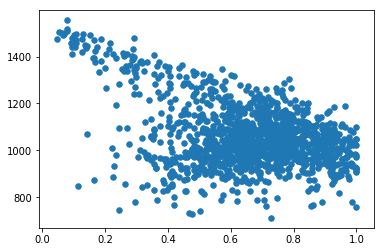

In [39]:
# relationship between the admission rate and SAT score
plt.scatter(csvapi_df.ADM_RATE_ALL, csvapi_df.SAT_AVG, s=30)

There is a strong negative relationship between the admission rate and SAT score. The higher the SAT score required the lower the admission rate.


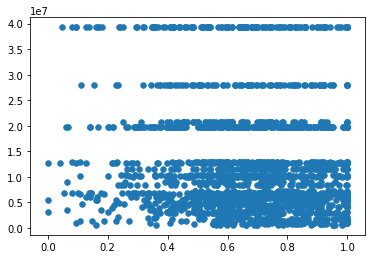

In [40]:
# relationship between the admission rate and population
plt.scatter(csvapi_df.ADM_RATE_ALL, csvapi_df.POP, s=30)

There is no relationship between the admission rate and population, or the relationship is too wake to show on the chart. 

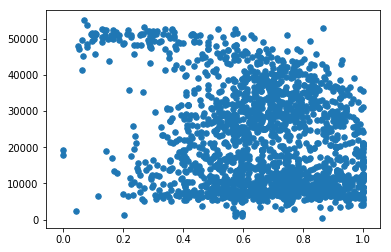

In [41]:
# relationship between the admission rate and in-state tutition
plt.scatter(csvapi_df.ADM_RATE_ALL, csvapi_df.TUITIONFEE_IN, s=30)

There is a weak negative relationship between the admission rate and in-state tutition.

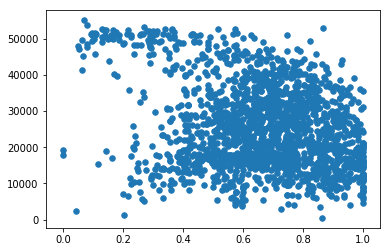

In [42]:
# relationship between the admission rate and out-of-state tutition
plt.scatter(csvapi_df.ADM_RATE_ALL, csvapi_df.TUITIONFEE_OUT, s=30)

There is a weak negative relationship between the admission rate and out-of-state tutition.

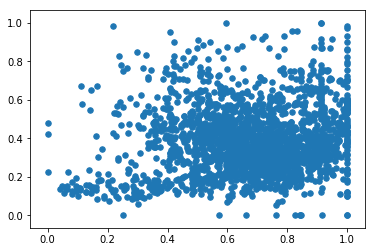

In [43]:
# relationship between the admission rate and Pell Grant
plt.scatter(csvapi_df.ADM_RATE_ALL, csvapi_df.PCTPELL, s=30)

There is a very weak positive relationship between the admission rate and the percentage of Pell Grant received.

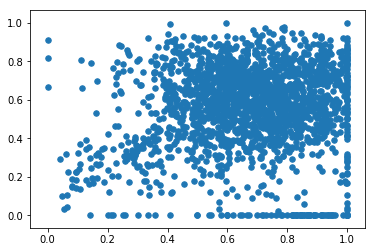

In [44]:
# relationship between the admission rate and student loan
plt.scatter(csvapi_df.ADM_RATE_ALL, csvapi_df.PCTFLOAN, s=30)

There is a very weak positive relationship between the admission rate and the percentage of student loan received.

### MAP
To better understand how the admission rate varies from states and how they present on the geography way, we decide to map the mean value of each column for each state.

In [60]:
#import
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

3.7.1


In [62]:
init_notebook_mode(connected=True)

In [65]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd




scl = [
    [0.0, 'rgb(84,39,143)'],
    [0.2, 'rgb(117,107,177)'],
    [0.4, 'rgb(158,154,200)'],
    [0.6, 'rgb(188,189,220)'],
    [0.8, 'rgb(218,218,235)'],
    [1.0, 'rgb(242,240,247)']
]
    
result04['text'] = '<br>' + \
    'State: '+ result04['STABBR'] + '<br>' + \
    'Average SAT: ' + round(result04['SAT_AVG'],1).astype(str) + '<br>' + \
    '<br>' + \
    'Population: '+ result04['POP'].astype(str) + '<br>' + \
    'The average annual Income: $' + round(result04['SAEMHI_PT'],1).astype(str)

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = result04['STABBR'],
    z = result04['ADM_RATE_ALL'].astype(float).round(2),
    locationmode = 'USA-states',
    text = result04['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 1
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Admission Rate")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2016-17 US Colleges Admission Rate by State<br>(Hover for Details)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig, filename = 'US-College-Map')

In [69]:
%%html
<iframe width="900" height="800" frameborder="0" scrolling="no" src="//plot.ly/~johnnyzhu/6.embed"></iframe>

Click the link down below if you can't see the embedded map

In [58]:
from IPython.core.display import HTML
HTML('<a href="https://plot.ly/~johnnyzhu/6/_2016-17-us-colleges-admission-rate-by-state-hover-for-details/">link</a>')

According to the map, we could find out Eastern and western coastal areas tend to have a higher admission rate. There is a very density area on the map which is CT, Connecticut state. It has the lowest admission rate. In contrast, WY, Wyoming state has the highest admission rate.

### Correlation Matrix
Through the correlation matrix, we could know the overall admission rate is not very relative with the numerical factors like SAT score, annual cost, annual income, tuition fee, and monthly facility salary, etc. On the other hand, the Average SAT score has some high correlation with the percentage of receiving  Pell Grants, retention rate and family income. However, we need to dig down to figure out more relation.

In [48]:
corr = result03.corr()
corr.style.background_gradient(cmap='coolwarm')

,ADM_RATE_ALL,SAT_AVG,UGDS,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,AVGFACSAL,PCTPELL,RET_FT4,PCTFLOAN,AGE_ENTRY,FEMALE,MARRIED,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,SAEMHI_PT,POP
ADM_RATE_ALL,1,-0.397991,-0.0663356,-0.269093,-0.254367,-0.286276,-0.331252,0.141266,-0.200154,0.117951,0.170577,0.0868699,0.133957,0.112892,0.208633,-0.220557,-0.161895,-0.0767985,-0.0916603
SAT_AVG,-0.397991,1,0.267316,0.528883,0.486183,0.66073,0.69515,-0.711725,0.740069,-0.516035,-0.396661,-0.162173,-0.264631,-0.259847,-0.664356,0.681658,0.580924,0.172272,0.0823919
UGDS,-0.0663356,0.267316,1,-0.155807,-0.189522,0.0150808,0.408529,-0.259746,0.192592,-0.195841,-0.236773,-0.135102,-0.250704,-0.191566,-0.21147,0.209636,0.205417,0.054436,0.0816676
COSTT4_A,-0.269093,0.528883,-0.155807,1,0.974754,0.915885,0.353455,-0.222856,0.338693,0.436058,-0.29709,-0.0319342,-0.161391,0.141587,-0.585998,0.685497,0.631797,0.148176,0.0402498
TUITIONFEE_IN,-0.254367,0.486183,-0.189522,0.974754,1,0.92315,0.327126,-0.208977,0.327028,0.415936,-0.297632,-0.0238348,-0.153138,0.143024,-0.560072,0.671042,0.622277,0.135756,0.0173714
TUITIONFEE_OUT,-0.286276,0.66073,0.0150808,0.915885,0.92315,1,0.51619,-0.320845,0.457778,0.347252,-0.433887,-0.075561,-0.337664,-0.0752632,-0.673796,0.778229,0.720407,0.160465,0.017655
AVGFACSAL,-0.331252,0.69515,0.408529,0.353455,0.327126,0.51619,1,-0.526044,0.425135,-0.159739,-0.410128,-0.167487,-0.419901,-0.26096,-0.50377,0.538089,0.488241,0.278394,0.126298
PCTPELL,0.141266,-0.711725,-0.259746,-0.222856,-0.208977,-0.320845,-0.526044,1,-0.436353,0.505612,0.35023,0.251837,0.229143,0.0824173,0.539562,-0.559823,-0.552503,-0.149218,0.0154882
RET_FT4,-0.200154,0.740069,0.192592,0.338693,0.327028,0.457778,0.425135,-0.436353,1,-0.201866,-0.435865,-0.137942,-0.365359,-0.185901,-0.540037,0.523657,0.485636,0.163018,0.0715955
PCTFLOAN,0.117951,-0.516035,-0.195841,0.436058,0.415936,0.347252,-0.159739,0.505612,-0.201866,1,0.0697381,0.191581,-0.035518,0.0595281,-0.055076,0.11829,0.079804,-0.0401261,-0.0940655


#### According to the EDA, we conclude that:
- Gender as a factor has a strong effect on the admission rate. The women-only institution has lower admission rate than men-only.
- The type of institution can affect the admission rate. The admission rate of private-for-nonprofit institution lower than the public, which is lower than the private-for-profit.
- There is a strong negative relationship between the admission rate and SAT score.
- There is no relationship between the admission rate and population
- There is a weak negative relationship between the admission rate, and in-state tuition and in-state tuition, respectively.
- There is a very weak positive relationship between the admission rate, and the percentage of Pell Grant received and student loan received, respectively.

## 4. Linear Regression Analysis
To gain a better accuracy of our model, we decided to drop the rows if either admission rate and SAT score have a null. For other columns, we fill them with the median value of the entire dataset.

With the numeric dependent variable — admission rate to be predicted, we decided to use multiple linear model to analyze it.

At the beginning of our Linear Regression analysis, we have a general expectation that the admission rate would be higher if the average SAT increased. And the admission rate would be higher if the families who apply for that school are wealthy — or paying more in other words. 

However, the result of linear regression is out of our expectation. For example, the model quality that running prediction for the admission rate is low so that the result would not be that convincing.
Therefore, we decide to replace SAT_AVG by ADM_RATE_ALL experimentally and hope this could allow us to understand the dataset better and get a more useful insight. Because the predicting value is still numeric, so we continued to use linear regression.

In [49]:
csvapi_df2 = csvapi_df.dropna(subset=['ADM_RATE_ALL', 'SAT_AVG'])
csvapi_df2 = csvapi_df2.fillna(csv_df.median())
csvapi_df2[['POP','SAEMHI_PT']] = csvapi_df2[['POP','SAEMHI_PT']].astype('float64')
csvapi_df2.drop(columns=['INSTNM','CITY','STABBR','ZIP','ACCREDAGENCY','INSTURL','LATITUDE','LONGITUDE'],inplace=True)

In [50]:
csvapi_df2.describe()

,CONTROL,MENONLY,WOMENONLY,ADM_RATE_ALL,SAT_AVG,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,...,PCTFLOAN,AGE_ENTRY,FEMALE,MARRIED,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,SAEMHI_PT,POP
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1.293000e+03
mean,1.611756,0.003867,0.023975,0.649749,1059.931941,0.001547,5561.901779,0.599084,0.133449,0.102801,...,0.568724,22.209761,0.580026,0.094888,0.008655,0.321230,67647.829853,52142.368136,59804.700696,1.124877e+07
std,0.500078,0.062089,0.153031,0.194507,136.230995,0.039314,7612.160028,0.215182,0.176203,0.112461,...,0.172343,2.307794,0.113605,0.065900,0.002978,0.098037,22911.228096,20818.073620,9011.689935,9.464695e+06
min,1.000000,0.000000,0.000000,0.048140,712.000000,0.000000,29.000000,0.000000,0.000000,0.000000,...,0.000000,19.230392,0.114943,0.005046,0.001021,0.088670,20393.621580,10702.000000,43238.000000,5.849100e+05
25%,1.000000,0.000000,0.000000,0.538462,970.000000,0.000000,1207.000000,0.494800,0.041900,0.037300,...,0.457700,20.469775,0.523364,0.038983,0.007475,0.254513,51586.474380,36398.500000,53506.000000,4.959822e+06
50%,2.000000,0.000000,0.000000,0.662470,1039.000000,0.000000,2353.000000,0.650500,0.075900,0.066400,...,0.585600,21.727628,0.581435,0.079426,0.010074,0.324253,63801.015070,48412.000000,59165.000000,8.414380e+06
75%,2.000000,0.000000,0.000000,0.779671,1119.000000,0.000000,6473.000000,0.756700,0.146100,0.122700,...,0.697800,23.318637,0.635593,0.154444,0.010074,0.389696,82027.265060,65029.000000,64783.000000,1.278708e+07
max,3.000000,1.000000,1.000000,1.000000,1555.000000,1.000000,55113.000000,0.984900,0.987500,0.948700,...,0.974100,33.822910,0.979567,0.468750,0.041407,0.615339,174263.250000,179864.000000,80711.000000,3.929648e+07


In [51]:
X = csvapi_df2[['SAT_AVG','CONTROL','MENONLY','WOMENONLY','DISTANCEONLY','COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT','AVGFACSAL','PCTPELL','PCTFLOAN','RET_FT4','AGE_ENTRY','FEMALE','MARRIED','VETERAN','FIRST_GEN','FAMINC','MD_FAMINC','UGDS','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN','POP','SAEMHI_PT']]
# here is response variable
Y = csvapi_df2['ADM_RATE_ALL']
# adding a constant
X = sm.add_constant(X) 

model_1 = sm.OLS(Y, X).fit()
predictions = model_1.predict(X)

print_model = model_1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ADM_RATE_ALL   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     26.20
Date:                Sun, 05 May 2019   Prob (F-statistic):          1.30e-113
Time:                        22:49:21   Log-Likelihood:                 604.28
No. Observations:                1293   AIC:                            -1145.
Df Residuals:                    1261   BIC:                            -979.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             34.7836     48.027      0.

The predicting model for Overall Admission Rate has an R-squared below 0.5 which means it is very weak.  Also, there are many factors whose P-value are more than 0.05 and we could see what would happen after we delete them.

In [52]:
X = csvapi_df2[['SAT_AVG','TUITIONFEE_OUT','PCTPELL','PCTFLOAN','RET_FT4','VETERAN','FAMINC','MD_FAMINC','UGDS','POP']]
# here is response variable
Y = csvapi_df2['ADM_RATE_ALL']
# adding a constant
X = sm.add_constant(X) 

model_1 = sm.OLS(Y, X).fit()
predictions = model_1.predict(X)

print_model = model_1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ADM_RATE_ALL   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     62.15
Date:                Sun, 05 May 2019   Prob (F-statistic):          7.65e-103
Time:                        22:49:21   Log-Likelihood:                 538.36
No. Observations:                1293   AIC:                            -1055.
Df Residuals:                    1282   BIC:                            -997.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6863      0.074     22.

After optimization, the R-square is still below 0.5. So we think the admission rate is unlikely to be predicted in this way. Even though the SAT score has a weak correlation with the admission rate shown before, we still want to examine whether it could fit better in our prediction model.

In [53]:
X = csvapi_df2[['ADM_RATE_ALL','CONTROL','MENONLY','WOMENONLY','DISTANCEONLY','COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT','AVGFACSAL','PCTPELL','PCTFLOAN','RET_FT4','AGE_ENTRY','FEMALE','MARRIED','VETERAN','FIRST_GEN','FAMINC','MD_FAMINC','UGDS','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN','POP','SAEMHI_PT']]
# here is response variable
Y = csvapi_df2['SAT_AVG']
# adding a constant
X = sm.add_constant(X) 

model_1 = sm.OLS(Y, X).fit()
predictions = model_1.predict(X)

print_model = model_1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                SAT_AVG   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     235.4
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        22:49:21   Log-Likelihood:                -6950.4
No. Observations:                1293   AIC:                         1.396e+04
Df Residuals:                    1261   BIC:                         1.413e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3055.9570   1.66e+04      0.

It turns out the overall average SAT score is much better to be predicted in our model since the R-square is 0.853 this time. However, this model still needs to be optimized because many factors have a P-value that larger than 0.05

In [54]:
X = csvapi_df2[['ADM_RATE_ALL','WOMENONLY','DISTANCEONLY','TUITIONFEE_OUT','AVGFACSAL','PCTPELL','PCTFLOAN','RET_FT4','FEMALE','MARRIED','VETERAN','FIRST_GEN','FAMINC','UGDS','SAEMHI_PT']]
# here is response variable
Y = csvapi_df2['SAT_AVG']
# adding a constant
X = sm.add_constant(X) 

model_1 = sm.OLS(Y, X).fit()
predictions = model_1.predict(X)

print_model = model_1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                SAT_AVG   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     403.1
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        22:49:21   Log-Likelihood:                -7059.3
No. Observations:                1293   AIC:                         1.415e+04
Df Residuals:                    1277   BIC:                         1.423e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            997.0282     27.077     36.

## 5. Conclusion

Because we found the model of predicting admission rate is weak during the EDA process and regression analysis and thus not very convincing. Therefore we would focus more on the overall average SAT score and use that as the value to be predicted. According to the linear regress result, the following factors tend to increase the Average Overall SAT score:
- A lower admission rate,
- Being a women-only school,
- Being a distance-only school,
- Higher out-of-state tuition,
- Higher monthly faculty salary,
- A smaller percentage of students who received Pell Grants,
- A lower rate of students who received financial aid,
- A higher  retention rate,
- A lower percentage of female students,
- A higher percentage of students that are married,
- A higher percentage of students that are Veteran,
- A lower percentage of students that are the first generation to apply,
- A higher average family income,
- A higher amount of undergraduate students enrolments that fall,
- A lower average family income in that state

## 6. A Mini-Chatbot:  SAT for a School?
To better present our analytics, we made a mini chatbot. Users could answer some question, and we would provide them an estimated average overall SAT score to get in this school.

For the better user experience, we hide the questions that normal users won't notice about and set their median values as default.

In [2]:
x1 = input('What is the overall Admission Rate of this school(median is 0.66, mean is 0.65)?')
x2 = input('Is this women only school(1 is yes and  0 for no)?')
x3 = input('Is this school only offer online course(1 is yes and  0 for no)?')
x4 = input('How much is one year out-of-state Tuitionfee?(median is 25680, mean is 26814)')
x5 = 7438
x6 = 0.3446
x7 = 0.5856
x8 = 0.7669
x9 = 0.581435
x10 = 0.07942
x11 = 0.010074
x12 = 0.324253
x13 = input('What is your family Annual Income?(median is 63801, mean is 67647)')
x14 = input('How many undergraduate students enrollmented this fall?(median is 2353, mean is 5562)')
x15 = 59165
print('Estimate Average SAT is: ',float(x1)*(-102.1501)+float(x2)*(37.1874)+float(x3)*(120.8397)+float(x4)*(0.0021)+float(x5)*(0.0142)+float(x6)*(-187.1051)+float(x7)*(-80.71)+float(x8)*(266.1951)+float(x9)*(-87.1072)+float(x10)*(210.8699)+float(x11)*(2227.2363)+float(x12)*(-156.3069)+float(x13)*(0.0006)+float(x14)*(0.0016)+997.0282)

What is the overall Admission Rate of this school(median is 0.66, mean is 0.65)?0.67
Is this women only school(1 is yes and  0 for no)?0
Is this school only offer online course(1 is yes and  0 for no)?0
How much is one year out-of-state Tuitionfee?(median is 25680, mean is 26814)40000
What is your family Annual Income?(median is 63801, mean is 67647)100000
How many undergraduate students enrollmented this fall?(median is 2353, mean is 5562)3600
Estimate Average SAT is:  1214.2263715965
